## Question E
Build a multi-layer perceptron with your own design.  Experiment with the layers, size of each layer, and different activation functions.

### Question E.1
[5] Describe your network clearly with markdown.

#### Number of Layers: 5, 1 Input layer, 3 Hidden Layers, 1 Classification (Output) Layer
The input layer takes a matrix of shape (N, 784) where N is the number of images and 784 is the number of pixels.
The hidden layers all take the logits created by the previous layer, outputting 50 neurons each.
The output layer takes the logits created by the previous layer (hidden layer 3), and outputs the classification of each image as a vector of size 10 where each value in that vector represents the 'guess' that the image is that classification.
#### Activation Function of Each Layer
Layer 1 - Softplus, Layer 2 - Rectified Linear, Layer 3 - Softplus, Layer 4 - Rectified Linear, Layer 5 - Softplus

### Question E.2
[10] Build the model using TensorFlow.  Use the same cross-validation as in (B) and (D).

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [53]:
# Reset the graph
tf.reset_default_graph()

# Constants
numPixels = 784
layerOutput = 50
numClassifications = 10
rate = 0.2
epochs = 2000
iterationsPerEpoch = 10

# Shape = (N x 784). N images of size 28 pixels by 28 pixels
x = tf.placeholder(tf.float32, [None, numPixels])
# Shape = (N x 10). N images with one hot values indicating if it's 0-9
ref = tf.placeholder(tf.float32, [None, numClassifications])
# Shape = (N x 50). The hidden layer outputs 50 neurons which are fed to the next hidden layer
logits1 = tf.layers.dense(inputs=x, units=layerOutput, activation=tf.nn.softplus, name="L1")
# Shape = (N x 50). The hidden layer outputs 50 neurons which are fed to the next hidden layer
logits2 = tf.layers.dense(inputs=logits1, units=layerOutput, activation=tf.nn.relu, name="L2")
# Shape = (N x 50). The hidden layer outputs 50 neurons which are fed to the next hidden layer
logits3 = tf.layers.dense(inputs=logits2, units=layerOutput, activation=tf.nn.softplus, name="L3")
# Shape = (N x 50). The hidden layer outputs 50 neurons which are fed to the next hidden layer
logits4 = tf.layers.dense(inputs=logits3, units=layerOutput, activation=tf.nn.relu, name="L4")
# Shape = (N x 50). The hidden layer outputs 50 neurons which are fed to the next hidden layer
logits5 = tf.layers.dense(inputs=logits4, units=numClassifications, activation=tf.nn.softplus, name="L5")

# Convert the logit values into a probability from 0-1 (indicating confidence percentage) for each classification from 0-9
probability = tf.nn.softmax(logits5)
# Shape = (N). Take the highest percentile value in the prediction as the neural network's guess
prediction = tf.argmax((probability), axis=1)

# Calculate the cross entropy, doing the softmax function internally
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits5, labels=ref)
# Take the average of the cross entropy values
cost = tf.reduce_mean(cross_entropy)

# Take the largest 1 hot value for each image's label to get the classification of each image
labels = []
for label in mnist.test.labels:
    labels.append(np.argmax(label))
# Shape = (N). Convert the list into a numpy array for later comparisons
labels = np.array(labels)

# Initialize the optimizer
optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
s = tf.Session()
s.run(tf.global_variables_initializer())

# Initialize values to graph later or use for later calculations
errList = []
validationErrList = []
epochList = []

# Counter to keep track of the number of overall training iterations
count = 0
# Run the training on 2000 different image sets of size 100 
for _ in range(epochs):
    inputData, correctAns = mnist.train.next_batch(100)
    validationInput, validationCorrect = mnist.train.next_batch(100)
    # Run the training on the image set of size 100, 10 times
    for _ in range(iterationsPerEpoch):
        # Do the training
        err, _ = s.run((cost, optimizer), feed_dict={x: inputData, ref: correctAns})

        # Calculate the cross validation error
        validationErr = s.run((cost), feed_dict={x: validationInput, ref: validationCorrect})
        
        # Add the values to be tracked into their respective lists    
        errList.append(err)
        validationErrList.append(validationErr)    
        epochList.append(count)
        count += 1

# Print done to indicate that the training is done
print("DONE")

DONE


### Question E.3
[5] Plot the training error.

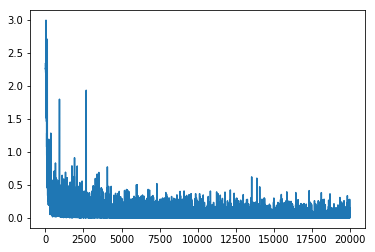

In [54]:
plt.plot(epochList, errList);
plt.show()

### Question E.4
[5] Plot the cross-validation error over the epochs. Is there overfitting?

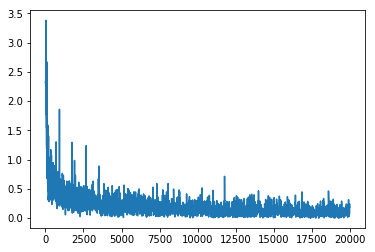

In [55]:
plt.plot(epochList, validationErrList);
plt.show()

There is no evident overfitting error in the above plot, this is because the training data changes every 10 iterations of training. Thus you will not see a very obvious cross validation error (ie. a smooth curve going up) since the amount of training data is huge. However it can be shown in the above graph that the cross validation error goes up and down but there is no consistent increase which would indicate an overfitting error.

### Question E.5
[5] Report the test error, and compare with (B.4) and (D.4).  Comment on your observation.

In [56]:
# Check the test error
predic = s.run((prediction), feed_dict={x: mnist.test.images})
answers = np.equal(labels, predic)
corrGuesses = np.sum(answers)
testErr = corrGuesses / len(answers)   
print("The test error for the final iteration of the training is: " + str((1 - testErr) * 100) + " percent.")

The test error for the final iteration of the training is: 3.4 percent.


The test error has decreased by a fairly large amount compared to B.4 where B.4 was getting around 8-10% error compared to E.5's 4-5% error. This makes sense since the number of neurons is significantly larger and can guess the image's number better. However, the this is not better than D.4's test error which was around 3-4%. The different activation functions did not appear to decrease the test error by much even though there are more layers. But this makes sense since the size of each of the layers is much smaller than D's number of neurons.